In [2]:
import numpy as np
import pandas as pd

In [3]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
from plot_functions import *
from sklearn.model_selection import KFold

In [4]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [5]:
n_splits = 10
import sys
case=2
a=2
cost='abs'

In [6]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [7]:
df, dfc = create_matrix_single_region("SanDiego", year)
tensor = get_tensor(df, dfc)
au_df, au_dfc = create_matrix_single_region("Austin", year)
au_tensor = get_tensor(au_df, au_dfc)

In [8]:
from sklearn.model_selection import train_test_split, KFold

In [9]:
n_splits = 10


In [10]:
from common import compute_rmse

In [11]:
out = {}
for scale in [1, 5, 10, 20]:
    out[scale] = {}
    for random_seed in range(5):
        
        out[scale][random_seed] = {}
        for c in [0.1, 1, 10]:
            out[scale][random_seed][c] = {}
            print (scale, random_seed, c)
            tensor_copy = tensor.copy()
            ################# PLEASE SEE THE LINE BELOW- CHANGED FROM learn_HAT to learn_HAT_random_normal #######
            H, A, T, Hs, As, Ts, HATs, costs = learn_HAT_random_normal(case, tensor_copy, a, 2, num_iter=12000, lr=0.1, dis=False, cost_function=cost, T_known=c*np.ones(12).reshape(-1, 1), random_seed=random_seed, scale_random=scale)
            out[scale][random_seed][c] = {'Hs':Hs, 'As':As, 'Ts':Ts, 'HATs':HATs, 'costs':costs}

1 0 0.1
1 0 1
1 0 10
1 1 0.1
1 1 1
1 1 10
1 2 0.1
1 2 1
1 2 10
1 3 0.1
1 3 1
1 3 10
1 4 0.1
1 4 1
1 4 10
5 0 0.1
5 0 1
5 0 10
5 1 0.1
5 1 1
5 1 10
5 2 0.1
5 2 1
5 2 10
5 3 0.1
5 3 1
5 3 10
5 4 0.1
5 4 1
5 4 10
10 0 0.1
10 0 1
10 0 10
10 1 0.1
10 1 1
10 1 10
10 2 0.1
10 2 1
10 2 10
10 3 0.1
10 3 1
10 3 10
10 4 0.1
10 4 1
10 4 10
20 0 0.1
20 0 1
20 0 10
20 1 0.1
20 1 1
20 1 10
20 2 0.1
20 2 1
20 2 10
20 3 0.1
20 3 1
20 3 10
20 4 0.1
20 4 1
20 4 10


In [ ]:
out[]

In [12]:
from plot_functions import *

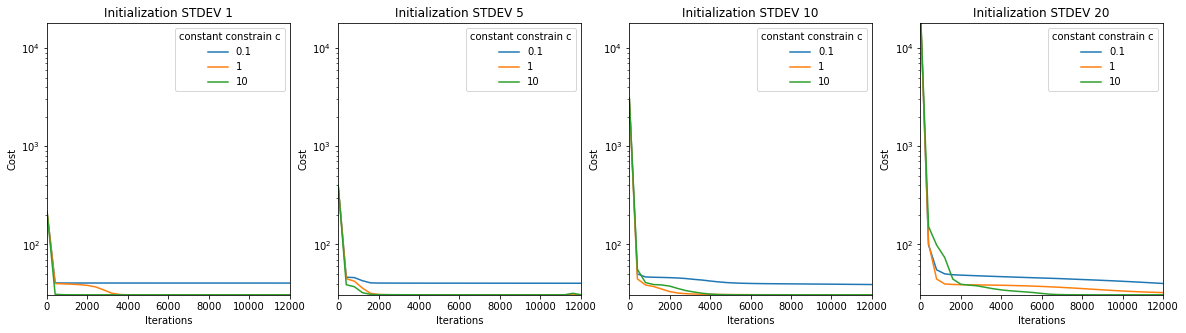

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
ax = axes.flatten()
random_seed=0
c=10
step=400
scale=20
count=0
# fig, ax  =plt.subplots()
for scale in [1, 5, 10, 20]:
    for c in [0.1, 1, 10]:
        tdf = pd.DataFrame({c:out[scale][random_seed][c]['costs'][::step]}, index=range(len(out[scale][0][c]['costs']))[::step])
        tdf.plot(logy=True, ax=ax[count])
        
    ax[count].set_ylim([0, 18000])
    ax[count].legend(title='constant constrain c')

    ax[count].set_xlabel("Iterations")
    ax[count].set_ylabel("Cost")
    ax[count].set_title("Initialization STDEV " + str(scale))

#         plt.xlim((-10, 12300))
#         plt.ylim((0, 18000))
#         plt.legend(title='Initialisation STDEV')
#         format_axes(ax[count])
#         plt.xlabel("Iterations")
#         plt.ylabel("Cost")
    count+=1

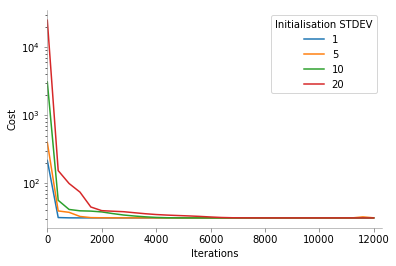

In [14]:
random_seed=0
c=10
step=400
fig, ax  =plt.subplots()
for scale in [1, 5, 10, 20]:
#     for c in [0.1, 1, 10]:
    tdf = pd.DataFrame({scale:out[scale][random_seed][c]['costs'][::step]}, index=range(len(out[scale][0][c]['costs']))[::step])
    tdf.plot(logy=True, ax=ax)
    plt.xlim((-10, 12300))
    plt.legend(title='Initialisation STDEV')
    format_axes(ax)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")

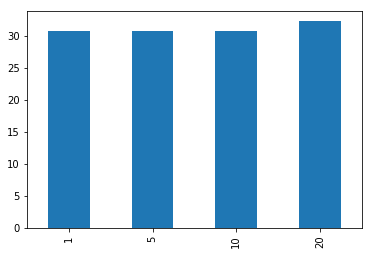

In [79]:
random_seed=0
step=400
fig, ax  =plt.subplots()
c = {}
for scale in [1, 5, 10, 20]:

    c[scale] = out[scale][0]['costs'][12000]
pd.Series(c).plot(kind='bar')